Sweeping over L: 100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


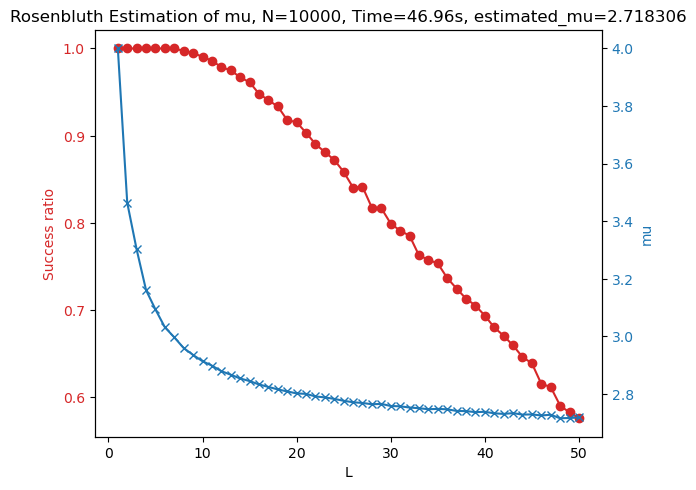

In [1]:
import random
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

def get_valid_neighbors(pos, visited):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    return [(pos[0] + dx, pos[1] + dy) for dx, dy in directions if (pos[0] + dx, pos[1] + dy) not in visited]

def generate_SAW_Rosenbluth(L):
    pos = (0, 0)
    path = [pos]
    weight = 1
    visited = {pos}
    for _ in range(L):
        valid_neighbors = get_valid_neighbors(pos, visited)
        m = len(valid_neighbors)
        if m == 0:
            return path, 0
        weight *= m
        pos = random.choice(valid_neighbors)
        visited.add(pos)
        path.append(pos)
    return path, weight

def monte_carlo_II(L, trials):
    total_weight = 0
    success_count = 0
    for _ in tqdm(range(trials), desc=f"Simulating L={L}", leave=False):
        _, weight = generate_SAW_Rosenbluth(L)
        total_weight += weight
        if weight > 0:
            success_count += 1
    estimated_cL = total_weight / trials
    success_ratio = success_count / trials
    return estimated_cL, success_ratio

def run_simulation(L_max, trials):
    mu_values = []
    success_ratios = []
    L_values = list(range(1, L_max + 1))
    for L in tqdm(L_values, desc="Sweeping over L"):
        estimated_cL, success_ratio = monte_carlo_II(L, trials)
        mu = estimated_cL**(1/L) if estimated_cL > 0 else 0
        mu_values.append(mu)
        success_ratios.append(success_ratio)
    return L_values, mu_values, success_ratios

def plot_results(L_values, mu_values, success_ratios, elapsed_time, trials):
    last_mu = mu_values[-1] if mu_values else 0
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('L')
    ax1.set_ylabel('Success ratio', color=color)
    ax1.plot(L_values, success_ratios, color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mu', color=color)
    ax2.plot(L_values, mu_values, color=color, marker='x')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f"Rosenbluth Estimation of mu, N={trials}, Time={elapsed_time:.2f}s, estimated_mu={last_mu:.6f}")
    plt.savefig('rosenbluth_mu_vs_l.png')
    plt.show()

def main(L_max, trials=10000):
    start_time = time.time()
    L_values, mu_values, success_ratios = run_simulation(L_max, trials)
    end_time = time.time()
    elapsed_time = end_time - start_time
    plot_results(L_values, mu_values, success_ratios, elapsed_time, trials)

# test case
main(L_max=50, trials=10000)

Sweeping over L: 100%|██████████| 200/200 [06:03<00:00,  1.82s/it]


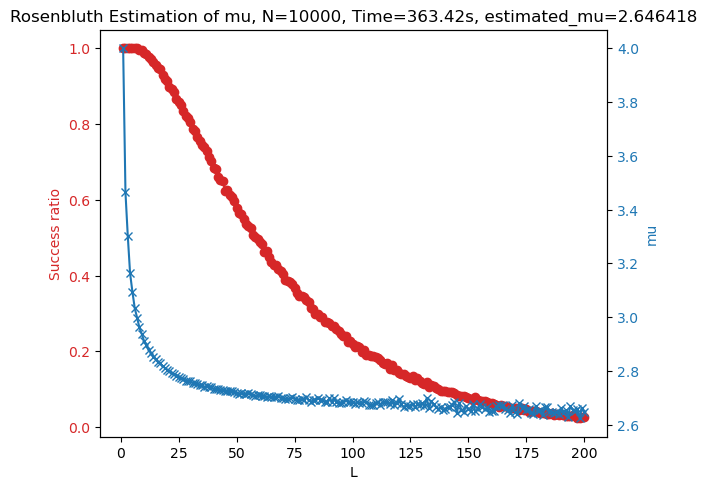

In [2]:
import random
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

def get_valid_neighbors(pos, visited):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    return [(pos[0] + dx, pos[1] + dy) for dx, dy in directions if (pos[0] + dx, pos[1] + dy) not in visited]

def generate_SAW_Rosenbluth(L):
    pos = (0, 0)
    path = [pos]
    weight = 1
    visited = {pos}
    for _ in range(L):
        valid_neighbors = get_valid_neighbors(pos, visited)
        m = len(valid_neighbors)
        if m == 0:
            return path, 0
        weight *= m
        pos = random.choice(valid_neighbors)
        visited.add(pos)
        path.append(pos)
    return path, weight

def monte_carlo_II(L, trials):
    total_weight = 0
    success_count = 0
    for _ in tqdm(range(trials), desc=f"Simulating L={L}", leave=False):
        _, weight = generate_SAW_Rosenbluth(L)
        total_weight += weight
        if weight > 0:
            success_count += 1
    estimated_cL = total_weight / trials
    success_ratio = success_count / trials
    return estimated_cL, success_ratio

def run_simulation(L_max, trials):
    mu_values = []
    success_ratios = []
    L_values = list(range(1, L_max + 1))
    for L in tqdm(L_values, desc="Sweeping over L"):
        estimated_cL, success_ratio = monte_carlo_II(L, trials)
        mu = estimated_cL**(1/L) if estimated_cL > 0 else 0
        mu_values.append(mu)
        success_ratios.append(success_ratio)
    return L_values, mu_values, success_ratios

def plot_results(L_values, mu_values, success_ratios, elapsed_time, trials):
    last_mu = mu_values[-1] if mu_values else 0
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('L')
    ax1.set_ylabel('Success ratio', color=color)
    ax1.plot(L_values, success_ratios, color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mu', color=color)
    ax2.plot(L_values, mu_values, color=color, marker='x')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f"Rosenbluth Estimation of mu, N={trials}, Time={elapsed_time:.2f}s, estimated_mu={last_mu:.6f}")
    plt.savefig('rosenbluth_mu_vs_l.png')
    plt.show()

def main(L_max, trials=10000):
    start_time = time.time()
    L_values, mu_values, success_ratios = run_simulation(L_max, trials)
    end_time = time.time()
    elapsed_time = end_time - start_time
    plot_results(L_values, mu_values, success_ratios, elapsed_time, trials)

# test case
main(L_max=200, trials=10000)